### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\python\python38\python.exe -m pip install --upgrade pip' command.


In [3]:
import cv2

In [4]:
pip install easygui imageio pillow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\python\python38\python.exe -m pip install --upgrade pip' command.


In [5]:
import easygui #to open the filebox
import numpy as np #to store image
import imageio #to read image stored at particular path
import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

In [6]:
def upload():
    ImagePath=easygui.fileopenbox()
    cartoonify(ImagePath)

In [7]:
def cartoonify(ImagePath):
    # read the image
    originalmage = cv2.imread(ImagePath)
    originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
    #print(image)  # image is stored in form of numbers

    # confirm that image is chosen
    if originalmage is None:
        print("Can not find any image. Choose appropriate file")

    ReSized1 = cv2.resize(originalmage, (960, 540))
    #plt.imshow(ReSized1, cmap='gray')


    #converting an image to grayscale
    grayScaleImage= cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
    ReSized2 = cv2.resize(grayScaleImage, (960, 540))
    #plt.imshow(ReSized2, cmap='gray')


    #applying median blur to smoothen an image
    smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
    ReSized3 = cv2.resize(smoothGrayScale, (960, 540))
    #plt.imshow(ReSized3, cmap='gray')

    #retrieving the edges for cartoon effect
    #by using thresholding technique
    getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, 
        cv2.ADAPTIVE_THRESH_MEAN_C, 
        cv2.THRESH_BINARY, 9, 9)

    ReSized4 = cv2.resize(getEdge, (960, 540))
    #plt.imshow(ReSized4, cmap='gray')
    
    colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
    ReSized5 = cv2.resize(colorImage, (960, 540))
    #plt.figure(figsize=(20, 10))
    #plt.imshow(ReSized5, cmap='gray')
    
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)
    ReSized6 = cv2.resize(cartoonImage, (960, 540))
    #plt.imshow(ReSized6, cmap='gray')
    
    images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]
    fig, axes = plt.subplots(3,2, figsize=(12,12), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    print(axes.flat)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')

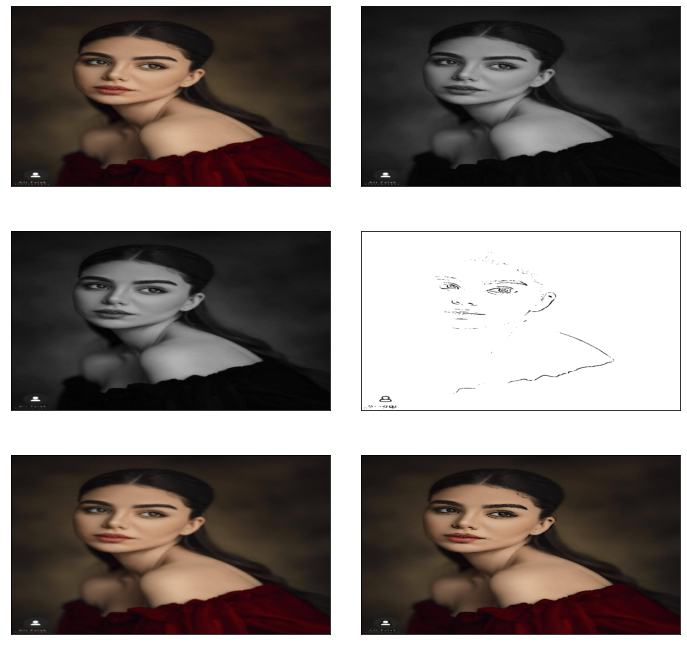

In [8]:
upload()

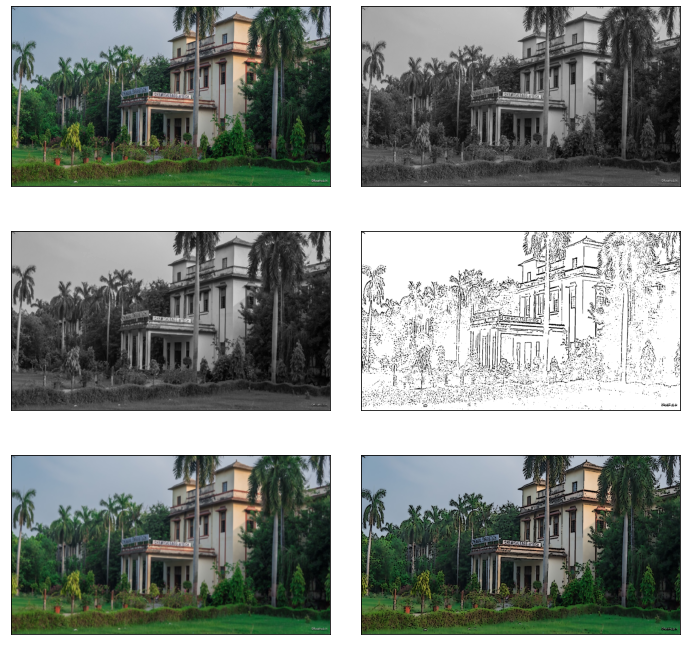

In [9]:
upload()